<a href="https://colab.research.google.com/github/AuliaVirza101/PCVK/blob/main/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


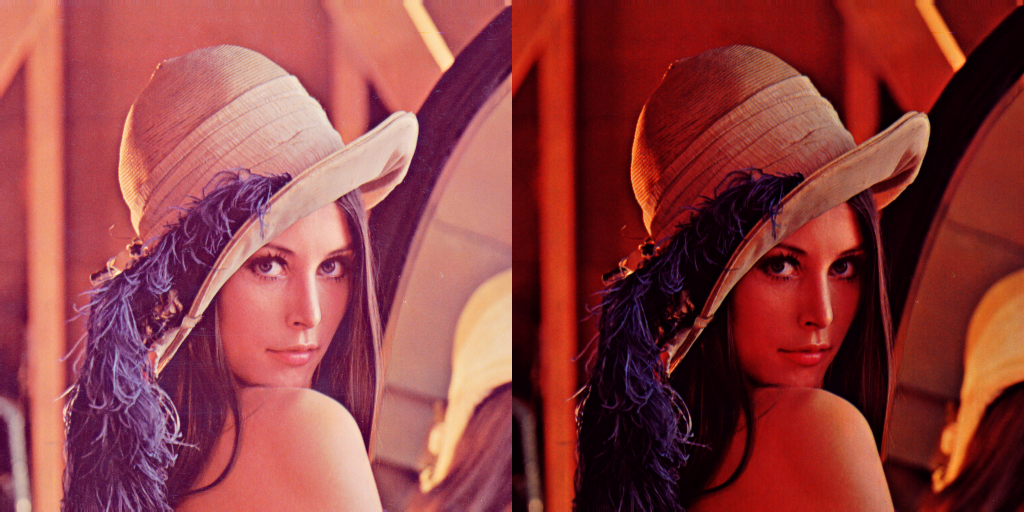

In [28]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print(' Gamma Correction pada citra ')
print('----------------------------------')

try:
    gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, not a number')

# Membaca gambar
img = cv.imread("drive/MyDrive/PCVK_2024/lena.png")

# Normalisasi nilai intensitas dari 0-255 ke 0-1
img_gamma = np.power(img/255,gamma) * 255

img_result = cv.hconcat([img, img_gamma.astype(np.uint8)])

cv2_imshow(img_result)




Bit depth

In [ ]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/Polinema/Kuliah/PCVK/
Images/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

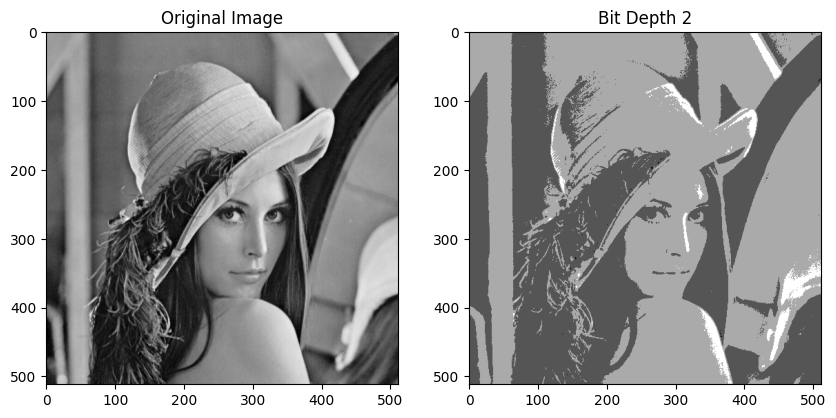

In [29]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Nilai kedalaman bit
bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)
original = cv.imread('drive/MyDrive/PCVK_2024/lena.png', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

# Menghitung nilai piksel baru berdasarkan kedalaman bit
depth_image = np.round(original / level) * level
depth_image = np.uint8(depth_image)

# Menampilkan gambar asli dan hasil reduksi kedalaman bit
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(depth_image, cmap='gray')
plt.title(f'Bit Depth {bit_depth}')

plt.show()


PNSR

In [45]:
import cv2
import numpy as np
from math import log10, sqrt
import glob

# Load all images from the specified directory
original = cv2.imread('drive/MyDrive/PCVK_2024/galazy.jpg')
cv_img = []
for img in glob.glob('drive/MyDrive/noises/*.jpg'):
    n = cv2.imread(img)
    if n is not None:
        cv_img.append(n)

def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:  # MSE 0 means no noise, so PSNR is not defined
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr


